# Predictor residual plots
## Does mariage cause divorce?

We consider the divorce rate over the 50 states 

In [1]:
library(rethinking)
data(WaffleDivorce)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

In [2]:
# summary(WaffleDivorce)
d <- data.frame(list(
	marriage_rate = WaffleDivorce$Marriage,
	marriage_age = WaffleDivorce$MedianAgeMarriage,
	divorce_rate = WaffleDivorce$Divorce
))
d$divorce_rate <- scale(d$divorce_rate)
d$marriage_rate <- scale(d$marriage_rate)
d$marriage_age <- scale(d$marriage_age)
summary(d)

   marriage_rate.V1     marriage_age.V1      divorce_rate.V1   
 Min.   :-1.7414862   Min.   :-2.2948942   Min.   :-1.9705473  
 1st Qu.:-0.7870127   1st Qu.:-0.5861871   1st Qu.:-0.7622965  
 Median :-0.1090075   Median :-0.1238310   Median : 0.0340507  
 Mean   : 0.0000000   Mean   : 0.0000000   Mean   : 0.0000000  
 3rd Qu.: 0.5229198   3rd Qu.: 0.5596519   3rd Qu.: 0.6656364  
 Max.   : 2.7873258   Max.   : 2.9317394   Max.   : 2.0935693  

In [12]:
model <- map2stan(
	alist(
		divorce_rate ~ dnorm(mu, sigma),
		mu <- a + b_age * marriage_age + b_rate * marriage_rate,
		c(a, b_age, b_rate) ~ dnorm(0, 1),
		sigma ~ dcauchy(0, 1)
	),
	data = d, chains = 8, cores = 8
)

Warning message in map2stan(alist(divorce_rate ~ dnorm(mu, sigma), mu <- a + b_age * :
"DEPRECATED: map2stan is no longer supported and may behave unpredictably or stop working altogether. Start using ulam instead."
Warning message in map2stan(alist(divorce_rate ~ dnorm(mu, sigma), mu <- a + b_age * :
"Stripping scale attributes from variable marriage_rate"
Warning message in map2stan(alist(divorce_rate ~ dnorm(mu, sigma), mu <- a + b_age * :
"Stripping scale attributes from variable marriage_age"
Warning message in map2stan(alist(divorce_rate ~ dnorm(mu, sigma), mu <- a + b_age * :
"Stripping scale attributes from variable divorce_rate"
Warning in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp6X4MfY/model-67182bd7389b.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
War

Running MCMC with 8 parallel chains...

Chain 1 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 1 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 1 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 1 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 1 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 1 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 1 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 1 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 1 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 1 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 1 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 1 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 1 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 1 Iteration: 1400 / 2000 [ 70%]  (Sampling) 
Chain 1 Iteration: 1500 / 2000 [ 75%]  (Sampling) 
Chain 1 Iteration: 1600 / 2000 [ 80%]  (Sampling) 
Chain 2 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 2 Iterati

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/Rtmp6X4MfY/model-67182bd7389b.stan', line 23, column 4 to column 40)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 4 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 4 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 4 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 4 Iteration:  500 / 2000 [ 25%]  (Warmup) 
Chain 4 Iteration:  600 / 2000 [ 30%]  (Warmup) 
Chain 4 Iteration:  700 / 2000 [ 35%]  (Warmup) 
Chain 4 Iteration:  800 / 2000 [ 40%]  (Warmup) 
Chain 4 Iteration:  900 / 2000 [ 45%]  (Warmup) 
Chain 4 Iteration: 1000 / 2000 [ 50%]  (Warmup) 
Chain 4 Iteration: 1001 / 2000 [ 50%]  (Sampling) 
Chain 4 Iteration: 1100 / 2000 [ 55%]  (Sampling) 
Chain 4 Iteration: 1200 / 2000 [ 60%]  (Sampling) 
Chain 4 Iteration: 1300 / 2000 [ 65%]  (Sampling) 
Chain 5 Iteration:    1 / 2000 [  0%]  (Warmup) 
Chain 5 Iteration:  100 / 2000 [  5%]  (Warmup) 
Chain 5 Iteration:  200 / 2000 [ 10%]  (Warmup) 
Chain 5 Iteration:  300 / 2000 [ 15%]  (Warmup) 
Chain 5 Iteration:  400 / 2000 [ 20%]  (Warmup) 
Chain 5 Iter

Computing WAIC



First we make counterfactual plots to investigate our model.

[ 1000 / 1000 ]
[ 8000 / 8000 ]
[ 1000 / 1000 ]
[ 8000 / 8000 ]
[ 1000 / 1000 ]
[ 8000 / 8000 ]
[ 1000 / 1000 ]
[ 8000 / 8000 ]
[ 1000 / 1000 ]
[ 8000 / 8000 ]
[ 1000 / 1000 ]
[ 8000 / 8000 ]


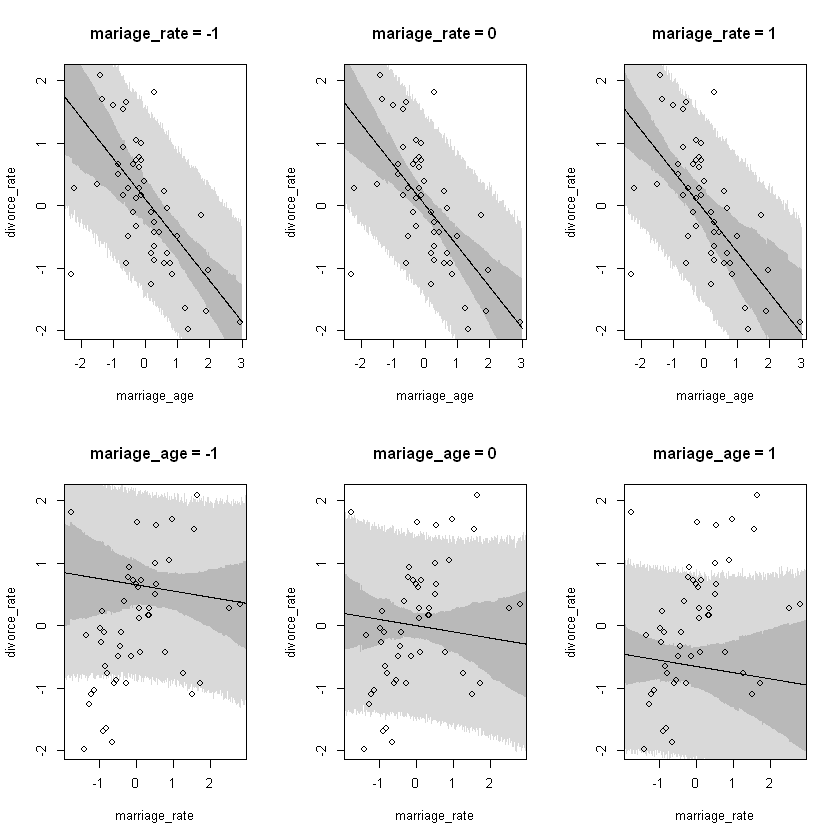

In [23]:
seq <- seq(from = -3, to = 3, by = 0.01)

conf <- 0.92

par(mfrow = c(2, 3))
# title(paste("Conterfactual plots with"), conf, "confidence interval")

for (rate in c(-1, 0, 1)) {

pred <- list(marriage_age = seq, marriage_rate = rate)
mu <- link(model, data = pred)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = conf)

plot(divorce_rate ~ marriage_age, data = d)
title(paste("mariage_rate =", rate))
lines(seq, mu_mean)
shade(mu_HPDI, seq)

resp <- sim(model, data = pred, n = 10000)
resp_HPDI <- apply(resp, 2, HPDI, prob = conf)
shade(resp_HPDI, seq)

}
for (age in c(-1, 0, 1)) {

pred <- list(marriage_rate = seq, marriage_age = age)
mu <- link(model, data = pred)
mu_mean <- apply(mu, 2, mean)
mu_HPDI <- apply(mu, 2, HPDI, prob = conf)

plot(divorce_rate ~ marriage_rate, data = d)
title(paste("mariage_age =", age))
lines(seq, mu_mean)
shade(mu_HPDI, seq)

resp <- sim(model, data = pred, n = 10000)
resp_HPDI <- apply(resp, 2, HPDI, prob = conf)
shade(resp_HPDI, seq)

}

We see that the marriage age has an inverse relation to the divorce rate at the 98 percent confidence interval. The marriage rate has not a significant influence on the divorce rate at 98 percent.

---

Next we consider the residuals.

In [26]:
coef(model)['a'] + 1

a 
1.000122